In [35]:
import numpy as np
import tensorflow_probability.substrates.numpy as tfp # numpy substrate is less error prone
import matplotlib.pyplot as plt
import scipy.stats

# Bayesian Mixture of Bernoulli

## Mixture Models

In mixture model, we account for heterogeneity in the data by assuming that there is not one single data generating process, but actually $K$ of them, such that we expect to find $K$ different clusters in our data, each of which suitably modeled by a density.  

Given $\{y_i\}_{i=1}^N$, the general model is given by

$$
    y_i \mid \mathbf{\pi}, \{p_k\}_{k=1}^K \sim p(y) := \sum_{k=1}^K \pi_k p_k(y)
$$

where $p_1(\cdot), \dots, p_K(\cdot)$ are $K$ probability density functions and $\mathbf{\pi} = (\pi_1, \ldots, \pi_K)$ s.t $\sum_{j=1}^K \pi_j = 1$.

The connection to clustering is made more explicit by introducing "cluster assignment" or __latent variables__ $z_i$, $i=1, \dots, n$ such that
$$
    p(z_i = j \mid \mathbf{\pi}) = \pi_j
$$
In other word, $z_i$ is the probability that the data $x_i$ belongs to the cluster j.
Then, the mixture likelihood can be restated as the following hierarchical model

$$
    y_i \mid z_i = j, \{p_k\}_{j=1}^K \sim p_j
$$

$$
    p(z_i = j  \mid \mathbf{\pi}) = \pi_j
$$

## Mixture of Bernoulli Distributions (for binary multivariate data)
Consider a set of $D$ binary random variables $x_l$, where $l=1,\dots,D$, each of which is governed by a Bernoulli distribution with parameter $\mu_l$
$$
    x_l | \mu_l \sim Be(\mu_l) = \mu_l^{x_l}(1-\mu_l)^{1-x_l}  \tag{1} \label{ber}
$$
such that 
$$
    \textbf{x} | \mathbf{ u} =  \prod_{l=1}^{D} \mu_l^{x_l}(1-\mu_l)^{1-x_l}   \tag{2} \label{mber}
$$  

where $ \textbf{x} = (x_1, \dots, x_D)^T$ and $\symbf{ u} = (\mu_i, \dots, \mu_D)^T$. 

Individual variables $x_l$ are independent given $\mathbf{\mu}$. The mean and covariance of this distribution are
$$
    \mathbb{E}[\textbf{x}] = \mathbf{u}
$$
$$
    \mathbf{cov}[\textbf{x}] = diag\{\mu_l(1-\mu_l)\}
$$  

The diagonal covariance matrix in this model is not able to capture any interesting relationship between the $D$ variables.  

Now let's consider a finite mixture of these distributions:
$$
    p(\textbf{x} | \mathbf{U}, \mathbf{\pi}) = \sum_{j=1}^K \pi_j p(\textbf{x} | \mathbf{u}_j)  \tag{3} \label{mixber}
$$
where $\mathbf{U} = \{\mathbf{u}_1, \dots, \mathbf{u}_K \}$, $\mathbf{\pi} = (\pi_1, \dots, \pi_k)$ and
$$
    p(\textbf{x} | \mathbf{u}_j) = \prod_{l=1}^{D} \mu_{jl}^{x_l}(1-\mu_{jl})^{1-x_l}
$$

The mean and covariance of this mixture distriubtion are given by
$$
    \mathbb{E}[\textbf{x}] = \sum_{j=1}^K \pi_j \mathbf{u}_j
$$
$$
    \mathbf{cov}[\textbf{x}] = \sum_{j=1}^K \pi_j{\mathbb{\Sigma}_j + \mathbf{u}_j \mathbf{u}_j^T} - \mathbb{E}[\textbf{x}]\mathbb{E}[\textbf{x}]^T
$$
where $\mathbb{\Sigma}_j = diag\{\mu_{jl}(1-\mu_{jl})\}$. Since the covariance matrix is no longer diagonal, the mixture of distriubtion can capture correlations between variables!

Let $\textbf{X}=\{\textbf{x}_i \}_{i=1}^N$ be $N$ different realization of our $D$-dimensional random variables. 

Suppose that the each realization of the $D$-dimensional r.v. $\textbf{x}$ has an hidden label indicating to which of the $K$ component of the mixture it correspond. We can model this introducing a latent variable $\textbf{z} = (z_1, \dots, z_K)$ associated to each $\textbf{x}_i$ having a single component equal to 1, in correspondonce of the true mixture component to which $\textbf{x}$ belong, and 0 in all the other componenents. Which distribution to assign to such latent variable? The probability for $\textbf{x}$ to be in a determinate cluster in is given by
$$
    p(z_j) = \pi_j
$$
so
$$
    p(\textbf{z}) \sim cat(\mathbf{\pi}) := \prod_{j=1}^K \pi_j^{\mathbb{1} \{z_j=1\}} 
$$
where $\mathbb{1} \{z_j=1\}$ evaluates to $1$ when $\textbf{z} = (0, \dots,1, \dots, 0)$ i.e. when $z_j=1$, $0$ in all the other cases.  

The mixture of Bernoulli model is simply defined by
$$
    \textbf{z} | \pi  \sim cat(\mathbf{\pi})
$$
$$
    p(\textbf{x}_i | \mathbf{u}, \mathbf{z}_i) =  \prod_{j=1}^K \left(\prod_{l=1}^{D} \mu_{jl}^{x_{il}}(1-\mu_{jl})^{1-x_{il}}\right)^{\mathbb{1} \{z_j=1\}} 
$$


## Let's get back to earth 
What can we do with this model?  

Let $\textbf{x}= \{ x_l\}_{l=1}^D$ be an image composed of $D$ binary pixel. Each pixel of $x_l$ can be modelled by a Bernoulli distribution of parameter $\mu_l$ as in \ref{ber}. So the image itself, considered as a $D$-dimensional r.v., can be modelled by the distribution considered in \ref{mber}.  

Consider now our dataset composed of $N$ different binary images $X = \{\textbf{x}_i \}_{i=1}^N$ and suppose that each image is sampled from one of the $K$ different subpopulations. For instance consider the MNIST dataset: each image represent an handwritten digit from 1 to 9. In this case images are drawn from one of the 9 different possible subpopolation, represented by a specific digit. Each subpopulation is thus modelled by  density described in \ref{mber}, and so, the overall data model can be described the mixture of Bernoulli described in \ref{mixber}.

## The Bayesian treatment
Let's starting introducing a prior over $\pi$. As $\pi$ represent a probability over a $K$-dimensional simplex $S_k$, a right choice for his prior distribution can be represented by a Diriclet distribution, often referred as a "probability distribution over probability distribution": 
$$
    \pi \sim Dir(\mathbf{\alpha}) := \frac{\prod_{j=1}^K \Gamma(\alpha_j)}{\Gamma(\sum_{j=1}^K \alpha_j)} \prod_{j=1}^K \pi_j^{\alpha_j -1}  
$$
where $\mathbf{\alpha} = (\alpha/K, \dots, \alpha/K)$.  

The other parameter for which we want to introduce a prior is the mean $\mu_l$ of the single data point $x_l$. As the support for $\mu_l$ is $[0,1]$ and the $\mu_l$ is bernoulli distribuited, an effective prior is given by the Beta distribution, which is a conjugate prior for the Bernoulli:
$$
    \mu_{jl} \sim Beta(a,b) := \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \mu_{jl}^{a-1}(1-\mu_{jl})^{b-1}
$$  

The complete Bayesian model is summered below.  

Given $\textbf{X}=\{\textbf{x}_i \}_{i=1}^N$, with $\textbf{x}_i= \{ x_{il}\}_{l=1}^D$:

$$
    x_{il} | \textbf{z}_i = j, \mu \sim Bern(\mu_{jl})
$$
$$
    \textbf{z}_i | \pi \sim Cat(\pi)
$$
$$
    \pi \sim \sim Dir(\alpha/K, \dots, \alpha/K)
$$
$$
    \mu_{jl} \sim Beta(a,b)
$$
where:  
- $\textbf{U} = \{\textbf{u}_j \}_{j=1}^K$,    $\textbf{u}_j = \{u_{jl} \}_{l=1}^D$
- $\mathbf{\pi} = (\pi_1, \dots, \pi_K)$
- for $\textbf{z}_i = j$ we mean that $\textbf{z}_i = (z_{i1} = 0, \dots,z_{ij} = 1 ,\dots z_{iK}=0)$.
- $K$ and $D$ are fixed constant.  

Getting back to earth again, let's try to stretch our intuition: we are assuming that a single data point $\textbf{x}$ can belongs to $K$ different clusters with means $\textbf{u}_j$ and that $\pi_j$ is the unknown prior probability of that data belonging to the the j-th cluster. We are assuming that we have no initial information to distinguish the cluster, which is capture by the symmetric prior $Dir(\alpha/K, \dots, \alpha/K)$. We further assign independent and identical prior distribution to each of cluster means.


## The Gibbs Sampler
Assume $\theta = (\theta_1, \dots, \theta_K)$. Gibbs Sampling is a method for sampling from a distribution of at least two dimension.  

It can be viewed as a Metropolis method in which the proposal distribution $Q$ is defined in terms of the conditional distributions of the joint distribution $P(\theta)$. It is assumed that whilst $P(\theta)$ is too complex to draw samples from directly, its conditional distributions $P(\theta_i | \theta_{-i})$ are tractable to work with.  

In the general case of a system with $K$ variables, a single iteration involves sampling one parameter at a time:  
\begin{align*}
\theta_{1}^{(t+1)} &\sim P(\theta_{1} | \theta_{2}^{(t)}, \theta_{3}^{(t)}, \dots, \theta_{K}^{(t)}) \\
\theta_{2}^{(t+1)} &\sim P(\theta_{2} | \theta_{1}^{(t+1)}, \theta_{3}^{(t)}, \dots, \theta_{K}^{(t)}) \\
\theta_{3}^{(t+1)} &\sim P(\theta_{3} | \theta_{1}^{(t+1)}, \theta_{2}^{(t+1)}, \dots, \theta_{K}^{(t)}), \dots
\end{align*}
Gibbs sampling can be viewed as a Metropolis method which has the property that every proposal is always accepted. Because Gibbs sampling is a Metropolis method, the probability distribution of $\theta^{(t)}$ tends to $P(\theta)$ as
$t  \xrightarrow[]{} \infty $.

## The Gibbs sampler for the multivariate Bayesian Mixture of Bernoulli
The goal is sample from the posterior distribution $p(\textbf{Z}, \textbf{U}, \pi  | \textbf{X})$ where:
- $\textbf{X}=\{\textbf{x}_i \}_{i=1}^N$
- $\textbf{U} = \{\textbf{u}_j \}_{j=1}^K$
- $\textbf{Z} = (\textbf{z}_1, \dots, \textbf{z}_N)$
- $\mathbf{\pi} = (\pi_1, \dots, \pi_K)$

We start noting that
$$
    p(\textbf{Z}, \textbf{U} , \pi  | \textbf{X}) \propto p(\textbf{Z} , \textbf{U}, \textbf{X}, \pi) = p(\pi)p(\textbf{Z}|\pi)p(\textbf{U})p(\textbf{X} | \textbf{Z}, \textbf{U})
$$
$$
    = p(\pi) \left( \prod_{i=1}^N p(\textbf{z}_i|\pi) \right) \left(\prod_{j=1}^J \prod_{l=1}^D p( \mu_{jl})  \right) \left( \prod_{i=1}^N \prod_{l=1}^D p(x_{il} | \textbf{z}_i) \right)
$$  

The full conditionals are (see appendix for derivation):  

1. $$ 
    p(\pi | \textbf{Z}, \textbf{U}, \textbf{X}) = Dir(\pi | N_1 + \alpha/K, \dots, N_K + \alpha/K) 
$$
where $ N_j = \sum_{i=1}^N  \mathbf{1} \{ \textbf{z}_i = j \} $ is the number of data point $\textbf{x}$ associated with to class $j = 1, \dots,K$. Note how the Diriclet distribution gives us a vector representing a probability over the $K$-dimensional simplex.

2. $$
   p(\textbf{U} | \textbf{Z}, \textbf{X}, \pi)  = \prod_{j=1}^K p(\textbf{u}_j | \textbf{Z}, \textbf{X}, \pi) = \prod_{j=1}^K \left( \prod_{l=1}^D p(u_{lj} | \textbf{Z}, \textbf{X}, \pi) \right) 
$$
where 
$$
    p(u_{lj} | \textbf{Z}, \textbf{X}, \pi) =  Beta(\mu_{jl} | \sum_{i=1}^{N_j} \mathbb{1} \{z_j=1\}x_{il} + a,  N_j - \sum_{i=1}^{N_j} \mathbb{1} \{z_j=1\}x_{il} + b)
$$



3. $$
      p(\textbf{Z} | \textbf{U}, \textbf{X}, \pi) =  \prod_{i=1}^N   p(\textbf{z}_i | \textbf{U}, \textbf{x}_i, \pi)
$$
where
$$
    p(\textbf{z}_i | \textbf{U}, \textbf{x}_i, \pi) = Cat(\textbf{z}_i | z_{i}, \dots, z_{iK})
$$
with
$$
    z_{ij} =  \pi_{j} \prod_{l=1}^D \mu_{jl}^{x_{il}}(1-\mu_{jl})^{1-x_{il}} =  \exp\{ \ln(\pi_{j}) + \sum_{l=1}^D x_{il} \ln (\mu_{jl}) \}
$$

   



Here follows the complete Gibbs sampler algorithm:

__Gibbs Sampling for Bayesian Mixture of Bernoulli__

0. __Initialize__ $\pi^{(0)} = (\pi_1^{(0))}, \dots, \pi_K^{(0)})$, and $\textbf{u}_j^{(0)} = (\mu_{j1}^{(0)}, \dots, \mu_{jD}^{(0)} )$ for all $j$
   
1. __For__ $t=1, \dots, T$:
   - compute $z_{ij} = \pi_{j}^{(t-1)}\prod_{l=1}^D \left(\mu_{jl}^{(t-1)}\right)^{x_{il}}\left(1 - \mu_{jl}^{(t-1)}\right)^{1-x_{il}}$ and $z_i = \sum_{j=1}^K z_{ij}$ for all $i, j$
     
   - sample $\textbf{z}_i^{(t)} \sim Cat(z_{i}, \dots, z_{iK})/ z_i$ for all $i$
     
   - sample $\pi^{(t)}  \sim Dir(\pi | N_1 + \alpha/K, \dots, N_K + \alpha/K) $ where $ N_j = \sum_{i=1}^N  \mathbf{1} \{ \textbf{z}_i^{(t)} = j \} $

   - sample $\mu_{jl}^{(t)} \sim Beta(\mu_{jl} | \sum_{i=1}^{N_j} \mathbb{1} \{z_j=1\}x_{il} + a,N_j - \sum_{i=1}^{N_j} \mathbb{1} \{z_j=1\}x_{il} + b)$ for all $j$, $l$
  
2. __End__

# Implementation

In [2]:
# MU = K x D, X = N x D, pi = 1 x K, return Z = N x K
def sample_z(pi, MU, X):
    N = X.shape[0]
    K = MU.shape[0]

    Z = np.zeros((N, K))
    z_i = np.zeros(K)
    
    for i in np.arange(N):
        for j in np.arange(K):
            z_i[j] = np.exp(np.log(pi[j]) + np.sum(X[i,:]*np.log(MU[j,:])))
        
        cat = tfp.distributions.Categorical(probs=z_i)
        sample = cat.sample()
        Z[i, sample] = 1
        
    return Z

In [3]:
# Z = N x K, alpha = 1 x 1, return pi = 1 x K
def sample_pi(Z, alpha):
    K = Z.shape[1]
    N_j = np.sum(Z, axis=0)

    alphas = N_j + (np.repeat(alpha, K) / K)
    dir = tfp.distributions.Dirichlet(alphas)
    pi = dir.sample()

    return pi

In [62]:
# X = N x D, Z = N x K, a = 1x1, b=1x1, return MU = K x D
def sample_mu(X, Z, a, b):
    N_j = np.sum(Z, axis=0)
    K = Z.shape[1]
    N = X.shape[0]
    D = X.shape[1]

    MU = np.zeros((K, D))

    for j in np.arange(K):
        for l in np.arange(D):
            sum_x_for_group_j = np.sum(X[: , l]*Z[:, j])
            beta = tfp.distributions.Beta(sum_x_for_group_j + a, N_j[j] - sum_x_for_group_j + b)
            MU[j,l] = beta.sample()

    return MU

In [75]:
# X = N x D, Z = N x K, MU = K x D, pi = 1 x K
def gibbs_sampler(hyperparameter, initial_value, X, T):
    N = X.shape[0]
    K = initial_value["MU"].shape[0]
    D = initial_value["MU"].shape[1]
    
    pi_t = initial_value["pi"]
    MU_t = initial_value["MU"]
    Z_t = np.zeros((N,K))

    alpha = hyperparameter["alpha"]
    a = hyperparameter["a"]
    b = alpha = hyperparameter["b"]

    # Initialize parameter chains to store samples
    Z_chain = np.zeros((T, N, K))
    MU_chain = np.zeros((T, K, D))
    pi_chain = np.zeros((T, K))
    
    for t in np.arange(T):
        Z_t = sample_z(pi_t, MU_t, X)
        pi_t = sample_pi(Z_t, alpha)
        MU_t = sample_mu(X, Z_t, a, b)

        # Save parameter samples at each iteration
        Z_chain[t, :, :] = Z_t
        MU_chain[t, :, :] = MU_t
        pi_chain[t, :] = pi_t

        if not (t % np.ceil(T/5).astype(int)):
            print("Iteration: ", t)

    return MU_chain, Z_chain, pi_chain

# Testing

## Synthetic data generation

Assume the following true data generating process: $D = 16$, $N=100$, $K=2$, 
- $\pi_1 = 1/2$, $\pi_2 = 1/2$
- $\textbf{u}_1 = (.8,.8,.8,.8,.8,.8,.8,.8, .2, .2,.2,.2, .2, .2,.2,.2)$
- $\textbf{u}_2 = (.2, .2,.2,.2, .2, .2,.2,.2,.8,.8,.8,.8,.8,.8,.8,.8,)$
  $$p(\textbf{x}) = \pi_1 Ber(\textbf{u}_1) + \pi_2 Ber(\textbf{u}_2)$$

In [51]:
N = 100
D = 16
K = 2
pi_1 = 1/2
pi_2 = 1/2
mu_1 = np.array([.8,.8,.8,.8,.8,.8,.8,.8, .2, .2,.2,.2, .2, .2,.2,.2])
mu_2 = np.array([.2, .2,.2,.2, .2, .2,.2,.2,.8,.8,.8,.8,.8,.8,.8,.8,])


data = np.zeros((N, D))
for i in np.arange(N):
    u = np.random.rand()

    if u < 1/2:
        data[i, :] = np.random.binomial(1, p=mu_1)
    else:
        data[i, :] = np.random.binomial(1, p=mu_2)

In [52]:
def visualize_binary_vectors(dataset, width, height, num_vectors=8):
    fig, axes = plt.subplots(2, 4, figsize=(10, 5))

    for i in range(num_vectors):
        binary_vector = dataset[i, :]
        binary_matrix = np.array(binary_vector).reshape((height, width))

        # Plot each binary image as a subplot
        n = np.ceil(num_vectors/2).astype(int)
        ax = axes[i // n, i % n]
        ax.imshow(binary_matrix)
        ax.set_title(f'Image {i + 1}')

    plt.tight_layout()
    plt.show()

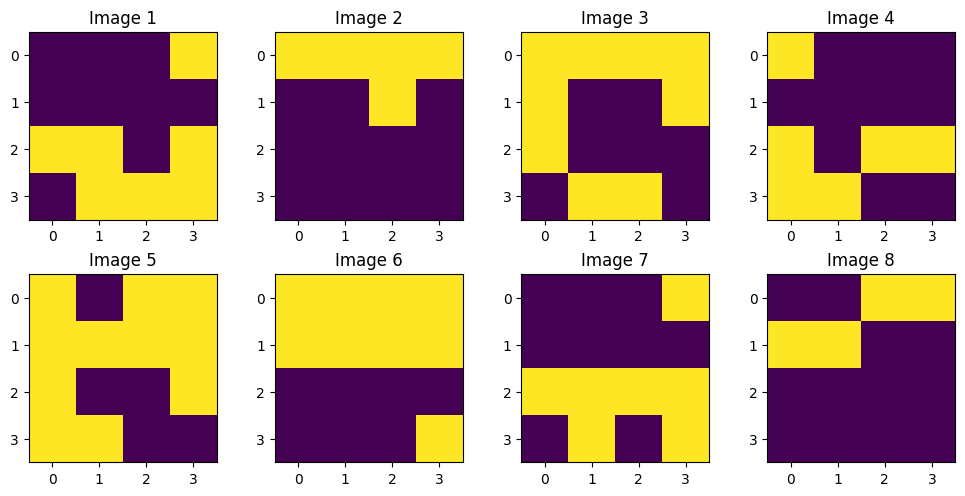

In [43]:
visualize_binary_vectors(data, 4,4)

## Test on synthetic data 

We set $a=1$ and $b=1$ as hyperparameter for the beta prior to reflect the lack of information about the single pixel mean $\mu_{lj}$. For the Diriclet prior, we set $\alpha = 1$ to obtain an equal prior probability that data belongs to some particular cluster, as in the true synthetic generated data.

In [77]:
# set hyperparameters
mu_1_init = np.random.rand(D)
mu_2_init = np.random.rand(D)
MU_init = np.stack((mu_1_init, mu_2_init))
pi_init = np.random.rand(K)

hyper = {
    "a" : 1, #flat prior for u_jl
    "b" : 1,
    "alpha" : 1 
}

# set initial value
init = {
    "MU" : MU_init,
    "pi" : pi_init
}

T = 150

In [78]:
MU_chain, Z_chain, pi_chain = gibbs_sampler(hyper, init, data, T)

Iteration:  0
Iteration:  30
Iteration:  60
Iteration:  90
Iteration:  120


# Parameters point estimate
We saved all the drawn from the posterior. We discard the first 100 samples as gibbs sampler may take time to converge to the equilibrum distribution. The we take as paramater point estimate the mode of the last 50 iteration, i.e the MAP estimate and we confront it with the mean.

In [79]:
MU_chain.shape

(150, 2, 16)

In [80]:
pi_chain.shape

(150, 2)

In [81]:
# TODO: first discard the first 100 parameter of the chain
MU_burned_in = MU_chain[101:, : , :]
Z_burned_in = Z_chain[101 :,:]
pi_burned_in = pi_chain[101:, :]

# Calculate mean along the temporal axis
mean_MU = np.mean(MU_burned_in, axis=0)
mean_Z = np.mean(Z_burned_in, axis=0)
mean_pi = np.mean(pi_burned_in, axis=0)

# Calculate mode along the temporal axis
# Note: scipy.stats.mode returns mode and counts, we only need the mode
mode_MU = scipy.stats.mode(MU_burned_in, axis=0).mode
mode_Z = scipy.stats.mode(Z_burned_in, axis=0).mode
mode_pi = scipy.stats.mode(pi_burned_in, axis=0).mode

Let's visualize the __mean__:

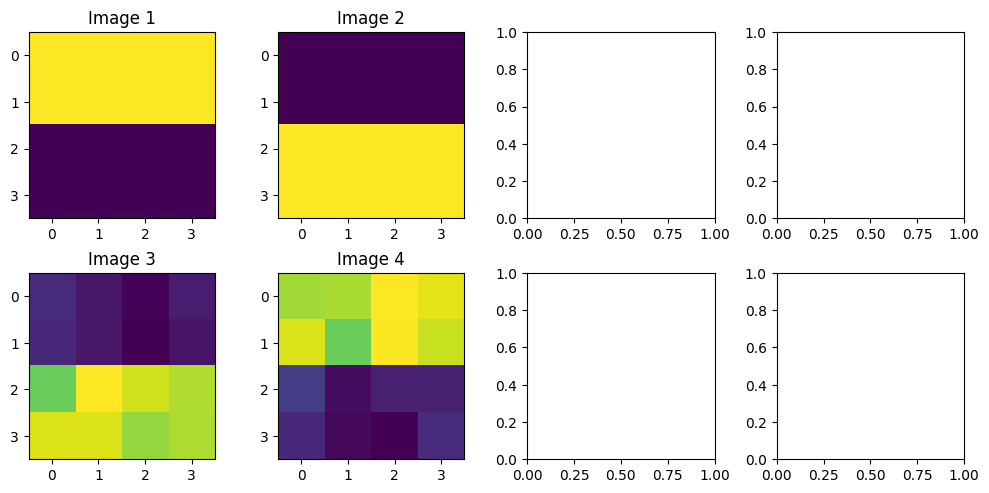

In [82]:
MU_true = np.stack((mu_1, mu_2))
MU_pred = mean_MU
MU_true_and_pred = np.concatenate((MU_true, MU_pred))
MU_true_and_pred.shape
visualize_binary_vectors(MU_true_and_pred,4,4, num_vectors=4)

Let's visualize the __mode (Map)__:

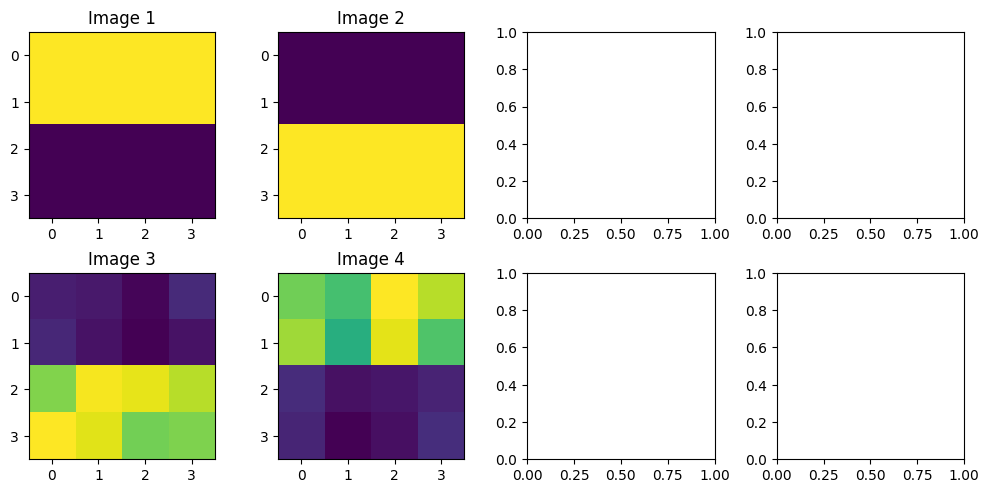

In [83]:
MU_true = np.stack((mu_1, mu_2))
MU_pred = mode_MU
MU_true_and_pred = np.concatenate((MU_true, MU_pred))
MU_true_and_pred.shape
visualize_binary_vectors(MU_true_and_pred,4,4, num_vectors=4)

Note: second row represent the learned $\textbf{U}$. First row represent the true $\textbf{U}$.

## Test on MNIST dataset

In the following we test the implemented model on a MINIST dataset.

In [84]:
from keras.datasets import mnist

In [85]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

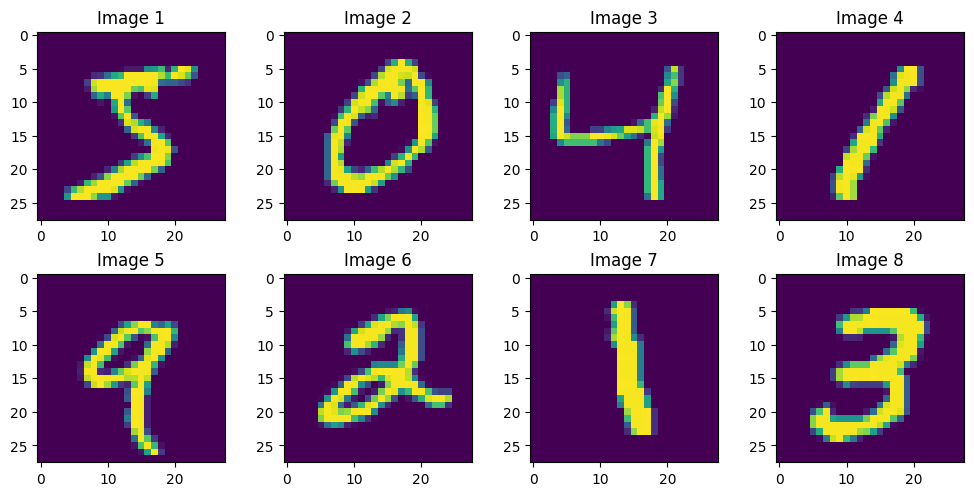

In [86]:
# Plot some digits
num_samples = 8
X_subset = X_train[:num_samples]

# Reshape images to a vector (1D array)
X_subset_reshaped = X_subset.reshape(num_samples, -1)

width = X_subset.shape[2]  # Width of the original image
height = X_subset.shape[1]  # Height of the original image

visualize_binary_vectors(X_subset_reshaped, width, height, num_samples)

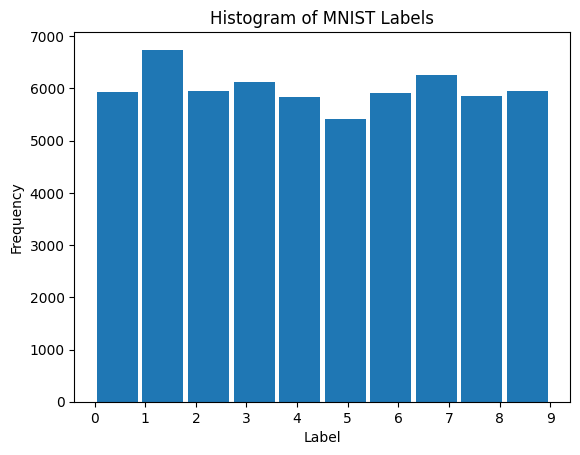

In [87]:
# Plot histogram for the labels
plt.hist(y_train,rwidth=0.9)
plt.title('Histogram of MNIST Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(np.arange(10))
plt.show()

Data is balanced as you can see above. 

__Digits 2, 3 and 4__

 We perform the test on the digits 2, 3 and 4. As data contain contain grey scale images (with each level represented as an int), we convert the selected images to binary using a simple treshold. Inference is performed sampling at random 1500 images from this preprocessed dataset. Class balance is conserved.    
 
We perform several trial. First setting $T=100$ as number of iteration, then setting $T=200$. In the first case digits 3 and 4 were correctly identifiable on the cluster mean, but digit 2 was not easy to recognize. The problem do not present for the second setting.  

Even here we set $a=1$ and $b=1$ as hyperparameter for the beta prior to reflect the lack of information about the single pixel mean $\mu_{lj}$. For the Diriclet prior, we set $\alpha = 1$ to obtain an equal prior probability that data belongs to some particular cluster, reflecting the label distribution of the test data.

In [88]:
# Data preparation
# Select only images with labels 2,3 and 4
selected_labels = [2, 3, 4]
selected_indices = np.isin(y_train, selected_labels)
X_selected = X_train[selected_indices]
y_selected = y_train[selected_indices]

# Convert images to binary using a threshold (e.g., 127)
threshold = 127
X_binary = (X_selected > threshold).astype(int)
X_binary.shape

# Reshape the data
X_binary_reshaped = X_binary.reshape(X_binary.shape[0], -1)
X_binary_reshaped.shape

# Randomly sample 10000 image
num_samples = 1500
random_indices = np.random.choice(X_binary_reshaped.shape[0], num_samples, replace=False)
X_sampled = X_binary_reshaped[random_indices]
y_sampled = y_selected[random_indices]
X_sampled.shape

(1500, 784)

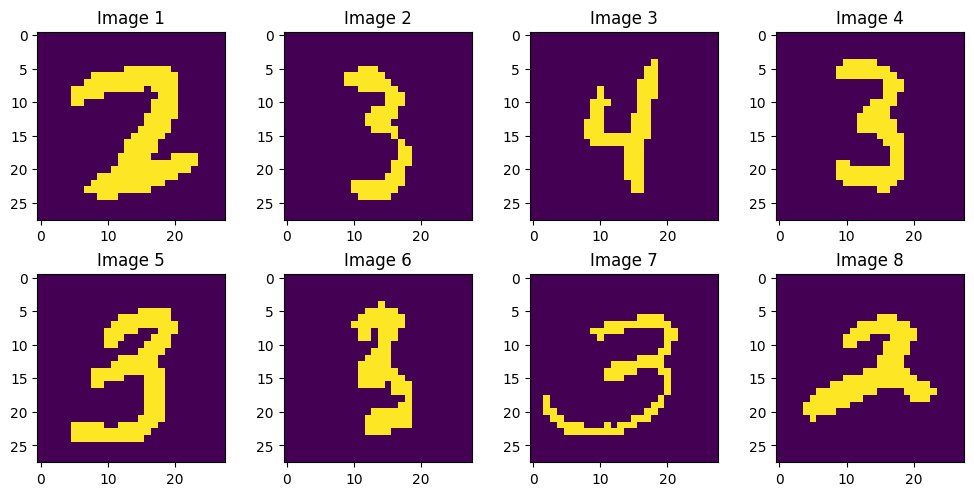

In [89]:
# Visualize the pre-processed data
num_samples = 8
X_subset = X_sampled[:num_samples]

width = X_binary.shape[2]  # Width of the original image
height = X_binary.shape[1]  # Height of the original image

visualize_binary_vectors(X_subset, width, height, num_samples)

In [90]:
# set hyperparameters
K =3
D = width*height
mu_0_init = np.random.rand(D)
mu_1_init = np.random.rand(D)
mu_2_init = np.random.rand(D)
#mu_2_init = np.random.rand(D)
MU_init = np.stack((mu_0_init, mu_1_init, mu_2_init))
pi_init = np.random.rand(K)

hyper = {
    "a" : 1, #flat prior for u_jl
    "b" : 1,
    "alpha" : 1 
}

# set initial value
init = {
    "MU" : MU_init,
    "pi" : pi_init
}

T = 200

In [91]:
# Perform the inference
MU_t, Z_t, pi_t = gibbs_sampler(hyper, init, X_sampled, T)

Iteration:  0
Iteration:  40
Iteration:  80
Iteration:  120
Iteration:  160


In [99]:
# TODO: first discard the first 100 parameter of the chain
MU_burned_in = MU_t[101:, : , :]
Z_burned_in = Z_t[101 :,:]
pi_burned_in = pi_t[101:, :]

# Calculate mean along the temporal axis
mean_MU = np.mean(MU_burned_in, axis=0)
mean_Z = np.mean(Z_burned_in, axis=0)
mean_pi = np.mean(pi_burned_in, axis=0)

# Calculate mode along the temporal axis
# Note: scipy.stats.mode returns mode and counts, we only need the mode
mode_MU = scipy.stats.mode(MU_burned_in, axis=0).mode
mode_Z = scipy.stats.mode(Z_burned_in, axis=0).mode
mode_pi = scipy.stats.mode(pi_burned_in, axis=0).mode

Let's visualize the __mean__:

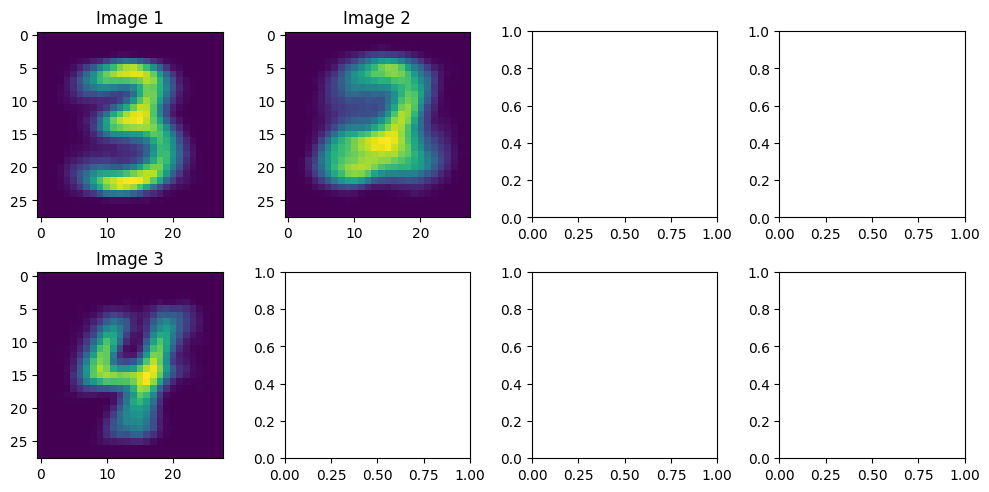

In [102]:
visualize_binary_vectors(mean_MU, width, height, num_vectors=3)

Let's visualize the __mode (Map)__:

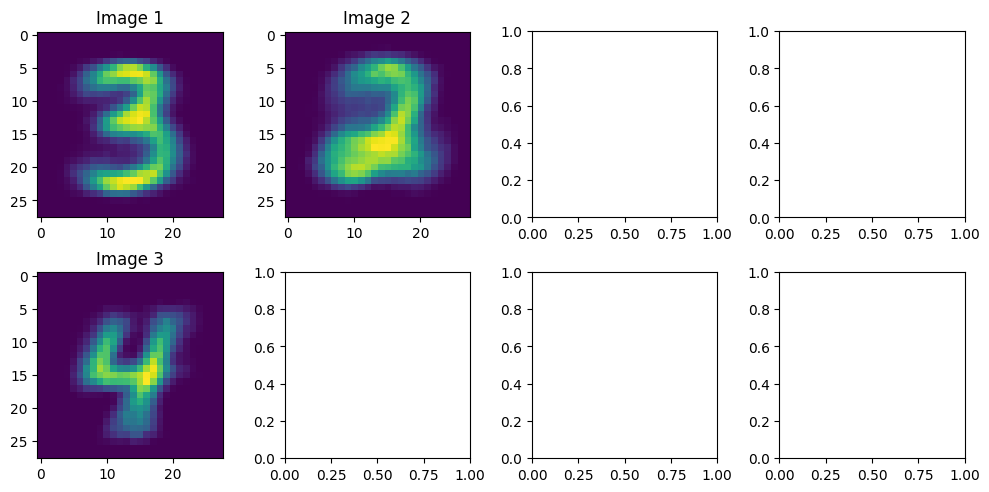

In [103]:
visualize_binary_vectors(mode_MU, width, height, num_vectors=3)

Let's visualize a single sample from the chain

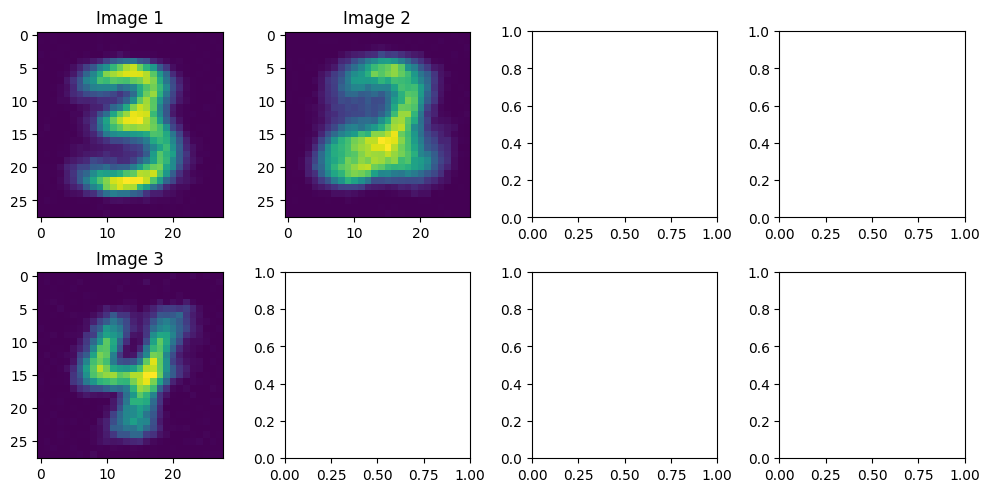

In [110]:
visualize_binary_vectors(MU_t[100, : , :], width, height, num_vectors=3)

Saving the monte carlo chain for future reuse

In [109]:
np.savez_compressed("./chains/chains.npz", Z_chain=Z_t, MU_chain=MU_t, pi_chain=pi_t)

In [ ]:
# Later, you can load the saved file using np.load
#loaded_data = np.load("chains.npz")
#Z_chain_loaded = loaded_data["Z_chain"]
#MU_chain_loaded = loaded_data["MU_chain"]
#pi_chain_loaded = loaded_data["pi_chain"]

# Prediction

Given a image $\textbf{x}$, denote with $\textbf{x}_q$ the uppper half of the image and with $\textbf{x}_{-q}$ the bottom half of the image. We are interested in predicting $\textbf{x}_{-q}$ given $\textbf{x}_q$.  

The predictive distribution we are intereseted in is  

$$
    p(\textbf{x}_{-q} | \textbf{x}_q) = \sum_{\textbf{z}} \int p(\textbf{x}_q | \textbf{u}, \textbf{z}, \pi) p(\textbf{u}, \textbf{z}, \pi | \textbf{X}) d\textbf{u}d\pi
$$
that can be estimated with

$$
    \frac{1}{T} \sum_{t=1}^T p(\textbf{x}_q | \textbf{u}^{(t)}, \textbf{z}^{(t)}, \pi^{(t)})
$$
where
$$
    p(\textbf{x}_q | \textbf{u}, \textbf{z}, \pi) = \prod_{j=1}^K \left(\prod_{l=1}^{D} \mu_{jl}^{x_{ql}}(1-\mu_{jl})^{1-x_{ql}}\right)^{\mathbb{1} \{z_j=1\}} 
$$
and
$$
   (\textbf{u}^{(t)}, \textbf{z}^{(t)}, \pi^{(t)}) \sim p(\textbf{u}, \textbf{z}, \pi | \textbf{X})
$$
In this settings, we can obtain a sample $(\textbf{u}^{(t)}, \textbf{z}^{(t)}, \pi^{(t)})$ at every iteration of the above defined Gibbs sampler

# Appendix

## Full conditionals derivations
1. $$
    p(\pi | \textbf{Z}, \textbf{U}, \textbf{X}) = p(\textbf{Z}|\pi) p(\pi) = \left( \prod_{i=1}^N p(\textbf{z}_i|\pi) \right) p(\pi)
$$

$$
      =  \prod_{i=1}^N \left( \prod_{j=1}^K \pi_j^{\mathbf{1}\{\textbf{z}_i = 1\}} \frac{\Gamma(\alpha/K + \dots + \alpha/K)}{\Gamma(\alpha/K)\dots\Gamma(\alpha/K)}  \pi_j^{\alpha/K -1} \right)
$$

$$
= \frac{\Gamma(\alpha)}{\Gamma(\alpha/K)^K}\prod_{j=1}^K \pi_j^{\sum_{i=1}^N \mathbf{1}\{\textbf{z}_i = 1\} + \alpha/K -1} 
$$
$$
    \sim Dir(\pi | N_1 + \alpha/K, \dots, N_K + \alpha/K)
$$

2. $$
   p(\textbf{U} | \textbf{Z}, \textbf{X}, \pi ) = \prod_{j=1}^K p(\textbf{u}_j | \textbf{Z}, \textbf{X}, \pi) = \prod_{j=1}^K \left( \prod_{l=1}^D p(u_{lj} | \textbf{Z}, \textbf{X}, \pi) \right)
$$
    with
$$
    p(u_{lj} | \textbf{Z}, \textbf{X}, \pi) = p( \mu_{jl}) \prod_{i=1}^N p(x_{il} | \textbf{z}_i) 
$$

$$
    = \frac{1}{B(a,b)} \mu_{jl}^{\sum_{i=1}^{N_j}\mathbb{1} \{z_j=1\}x_{il} + a -1}(1-\mu_{jl})^{N_j -\sum_{i=1}^{N_j}\mathbb{1} \{z_j=1\}x_{il} + b -1} 
$$

$$
     \sim Beta(\mu_{jl} | \sum_{i=1}^{N_j}\mathbb{1} \{z_j=1\} x_{il} + a,  N_j - \sum_{i=1}^{N_j} \mathbb{1} \{z_j=1\}x_{il} + b)
$$

3. $$
      p(\textbf{Z} | \textbf{U}, \textbf{X}, \pi) =  \prod_{i=1}^N   p(\textbf{z}_i | \textbf{U}, \textbf{x}_i, \pi)
$$
with
$$
   p(\textbf{z}_i | \textbf{U}, \textbf{x}_i, \pi) = p(\textbf{x}_i | \textbf{z}_i)p(\textbf{z}_i | \pi) = 
$$

$$
    =  \prod_{j=1}^K \pi_{j}^{\mathbb{1} \{z_j=1\}} \left(\prod_{l=1}^{D} \mu_{jl}^{x_{il}}(1-\mu_{jl})^{1-x_{il}}\right)^{\mathbb{1} \{z_j=1\}} 
$$

$$
     = \prod_{j=1}^K  \left(\pi_{j}  \prod_{l=1}^D \mu_{jl}^{x_{il}}(1-\mu_{jl})^{1-x_{il}}\right)^{\mathbb{1} \{z_j=1\}}
$$

$$
    \sim Cat(\textbf{z}_i | z_{i}, \dots, z_{iK})
$$
$$
    z_{ij} =  \pi_{j} \prod_{l=1}^D \mu_{jl}^{x_{il}}(1-\mu_{jl})^{1-x_{il}} =  \exp\{ \ln(\pi_{j}) + \sum_{l=1}^D x_{il} \ln (\mu_{jl}) \}
$$

# References
1. Bishop, Christopher M. Pattern Recognition and Machine Learning. New York :Springer, 2006, pp. 444-448
2. Kevin P. Murphy. 2012. Machine Learning: A Probabilistic Perspective. The MIT Press, p. 955
3. Stephen Tu, Learning mixture models. https://stephentu.github.io/writeups/mixturemodels.pdf
4. Maaten, Laurens van der. “Bayesian Mixtures of Bernoulli Distributions.” (2010).
5. Grantham, Neal S.. “Clustering Binary Data with Bernoulli Mixture Models.” (2014).
6. C. Mollica, L. Tardella. Gibbs Sampler for Bayesian Normal Mixture Models. https://web.uniroma1.it/memotef/sites/default/files/file%20lezioni/Lezione3_CMollica.pdf 
